In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
import numpy as np
from PIL import Image
import time
from matplotlib import pyplot as plt
import cv2
import argparse
import imutils

In [67]:
img = Image.open('/content/drive/MyDrive/NALAYATHIRAN_PLANT/nyvt_oli2_2022281_lrg.jpg' )
data = np.array(img, dtype='uint8')
image = cv2.imread('/content/drive/MyDrive/NALAYATHIRAN_PLANT/nyvt_oli2_2022281_lrg.jpg')

[[[225 207 197]
  [153 143 134]
  [ 94  93  88]
  ...
  [117 113 101]
  [144 139 107]
  [110 100  51]]

 [[120 102 102]
  [151 139 141]
  [159 157 162]
  ...
  [ 50  55  48]
  [129 125 100]
  [151 137 100]]

 [[101  84  92]
  [ 78  65  74]
  [ 95  89  99]
  ...
  [ 64  80  80]
  [116 114 102]
  [127 109  85]]

 ...

 [[134 118 121]
  [212 200 202]
  [220 211 212]
  ...
  [109  90  58]
  [112  96  63]
  [ 78  69  40]]

 [[200 184 187]
  [242 230 232]
  [218 209 210]
  ...
  [100  76  42]
  [127 104  72]
  [105  88  60]]

 [[202 186 187]
  [204 192 192]
  [219 211 209]
  ...
  [101  72  38]
  [ 88  59  27]
  [ 98  72  45]]] [[[197 207 225]
  [134 143 153]
  [ 88  93  94]
  ...
  [101 113 117]
  [107 139 144]
  [ 51 100 110]]

 [[102 102 120]
  [141 139 151]
  [162 157 159]
  ...
  [ 48  55  50]
  [100 125 129]
  [100 137 151]]

 [[ 92  84 101]
  [ 74  65  78]
  [ 99  89  95]
  ...
  [ 80  80  64]
  [102 114 116]
  [ 85 109 127]]

 ...

 [[121 118 134]
  [202 200 212]
  [212 211 220]
  ..

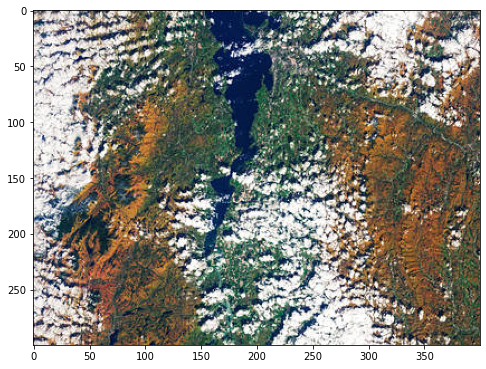

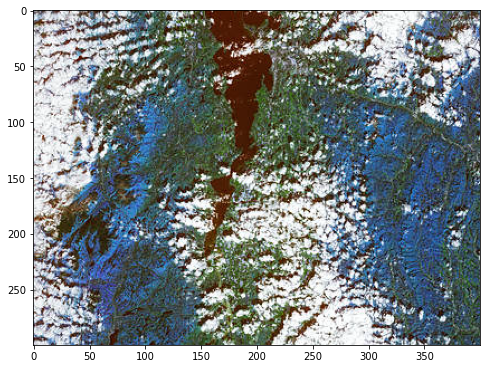

In [73]:
print(data, image)

plt.figure(figsize=(8, 8))
plt.imshow(data)

plt.figure(figsize=(8, 8))
plt.imshow(image)

plt.show()

(300, 400, 3) (300, 400, 3)


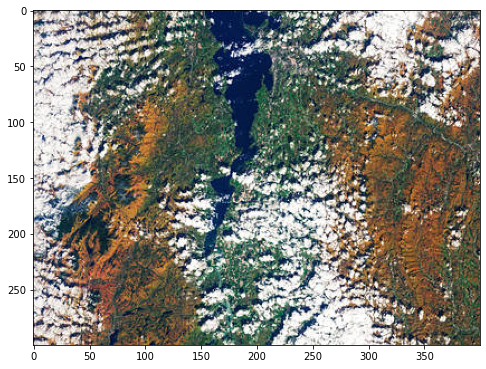

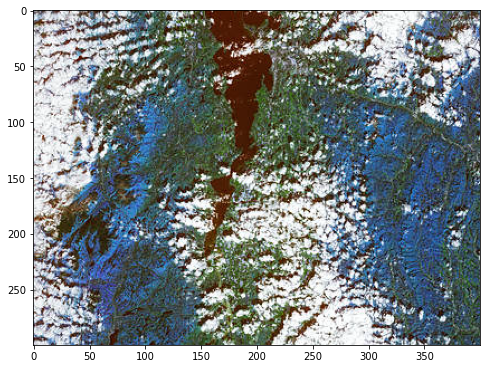

In [74]:
print(data.shape, image.shape)

plt.figure(figsize=(8, 8))
plt.imshow(data)

plt.figure(figsize=(8, 8))
plt.imshow(image)

plt.show()


In [75]:
a=data[:,3]
a= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
a=255-a
thresh = cv2.threshold(a, 10, 255, cv2.THRESH_BINARY)[1]
#thresh = cv2.adaptiveThreshold(a,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,2)
#kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))
#thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

In [76]:

low_threshold = 50
high_threshold = 150
kernel=5
edges = cv2.Canny(thresh, low_threshold, high_threshold,kernel)
#laplacian = cv2.Laplacian(thresh,cv2.CV_64F)

In [77]:

rho = 1 
theta = np.pi / 180 
threshold = 10 
min_line_length = 100 
max_line_gap = 20  
line_image = np.copy(image) * 0  

In [79]:

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
   for x1,y1,x2,y2 in line:
       cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
    
lines_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0)  

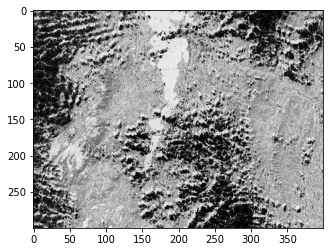

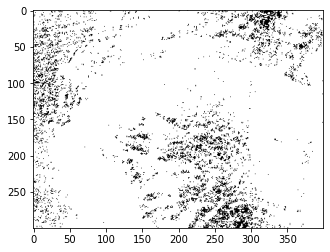

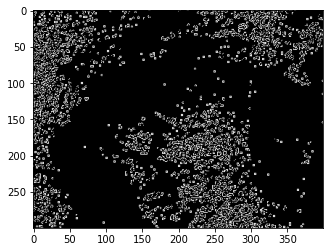

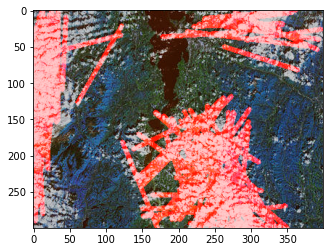

In [80]:
plt.figure()
plt.imshow(a,cmap='gray')
plt.figure()
plt.imshow(thresh,cmap='gray')
plt.figure()
plt.imshow(edges,cmap='gray')

plt.figure()
plt.imshow(lines_edges,cmap='gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7fa497cd50>,
 <matplotlib.image.AxesImage at 0x7f7fa48f3c50>)

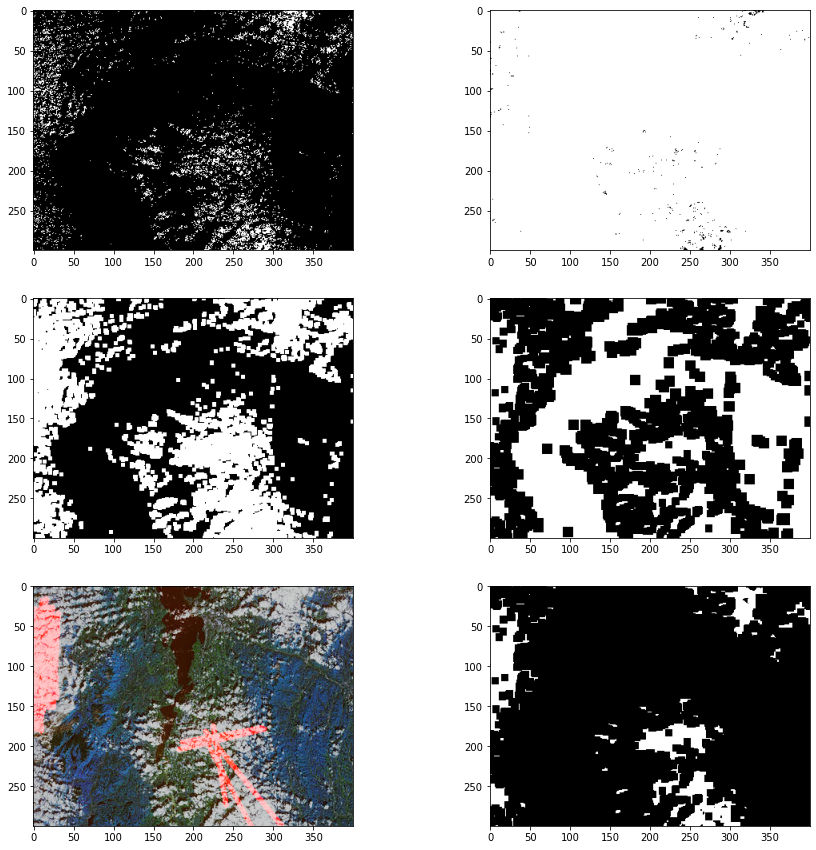

In [81]:
# filling holes
thresh = cv2.threshold(a, 10, 255, cv2.THRESH_BINARY_INV)[1]
im_floodfill = thresh.copy()
h, w = thresh.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(im_floodfill, mask, (0,0), 255);


final = np.multiply(255-thresh, im_floodfill)
line_image = np.copy(image) * 0
mask = 1 - final
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)
final = cv2.morphologyEx(final, cv2.MORPH_DILATE, kernel)
final = np.multiply(mask, final)

mask_dil = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)
mask_erd = cv2.morphologyEx(mask, cv2.MORPH_ERODE, kernel)
bound = mask_dil - mask_erd
bound = cv2.morphologyEx(bound, cv2.MORPH_DILATE, kernel)
bound = 1 - bound
final = np.multiply(bound, final)


# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(final, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)
for line in lines:
   for x1,y1,x2,y2 in line:
       cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)    
lines_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0)  


plt.figure(figsize=(15, 15))
plt.subplot(321), plt.imshow(thresh, cmap='gray')
plt.subplot(322), plt.imshow(im_floodfill, cmap='gray')
plt.subplot(323), plt.imshow(mask, cmap='gray')
plt.subplot(324), plt.imshow(bound, cmap='gray')
plt.subplot(325), plt.imshow(lines_edges, cmap='gray')
plt.subplot(326), plt.imshow(final, cmap='gray')